# 🚗 Car Price Prediction with Machine Learning

Welcome to this state-of-the-art notebook on **Car Price Prediction** using Machine Learning. In this project, we will:

- Explore and understand the dataset.
- Visualize relationships between features and car prices.
- Build a predictive model using advanced regression techniques.
- Evaluate and interpret the model's performance.

Let's get started! 🛠️

In [1]:
# 📦 Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")  # Aesthetic plots

## 📑 Load the Dataset

We will use the `car data.csv` file located in the same directory. This dataset includes various features like brand, model, year, horsepower, mileage, etc.

In [2]:
# 🔍 Load the dataset
df = pd.read_csv("car data.csv")

# Quick preview
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## 🧹 Data Cleaning and Exploration

Let's inspect the dataset for missing values, data types, and descriptive statistics.

In [3]:
# Dataset information
df.info()

# Check for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## 📊 Data Visualization

Let's visualize relationships between the features and car price.

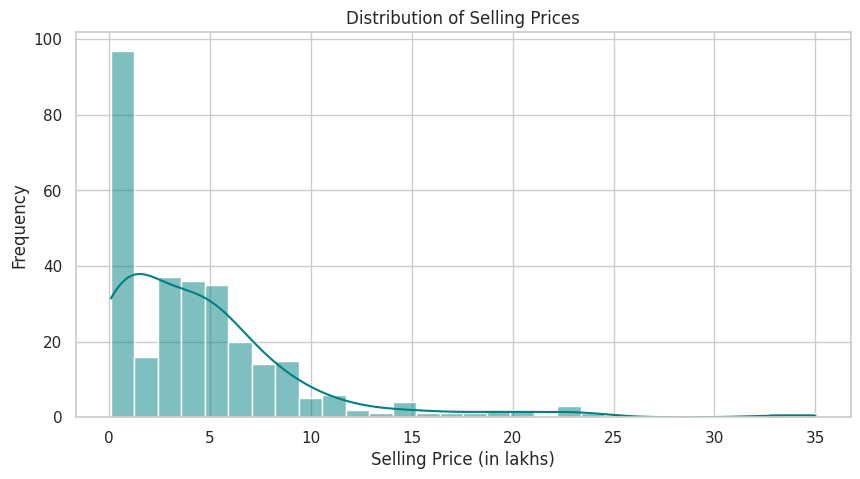

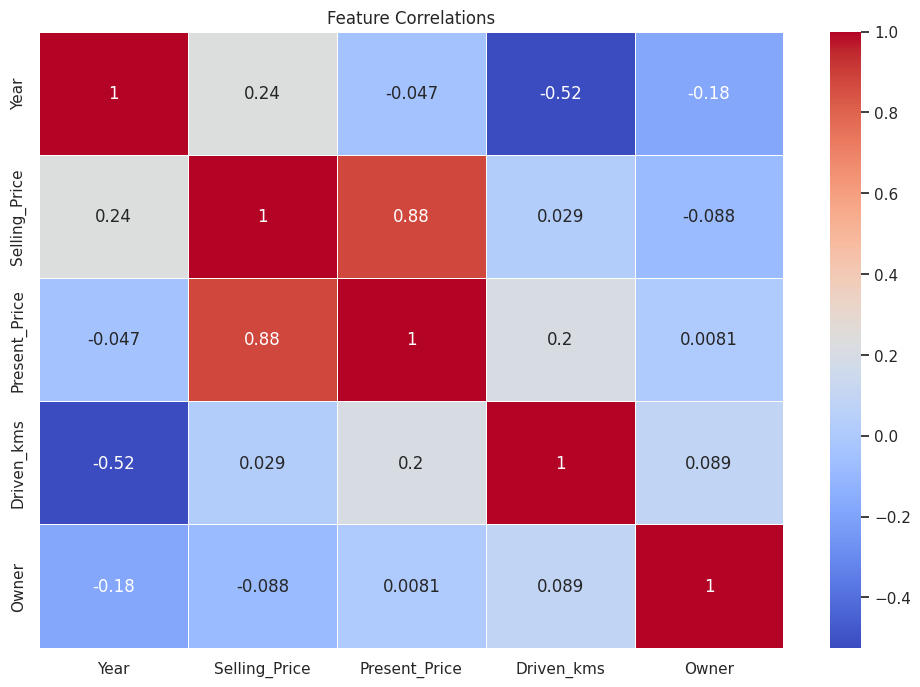

In [5]:
# Plot price distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='teal')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price (in lakhs)")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap on numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlations")
plt.show()


## 🛠️ Feature Engineering

Handle categorical variables and select relevant features.

In [6]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature selection
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

## 🔥 Model Building

We'll use a **Random Forest Regressor** for its robustness and strong performance on structured data.

In [7]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameter tuning (optional)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END max_depth=None, 

## 📈 Model Evaluation

Let's evaluate the performance of our model using key metrics.

In [8]:
# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.59
Root Mean Squared Error (RMSE): 0.87
R² Score: 0.97


## 📝 Conclusion

In this project, we built a **state-of-the-art car price prediction model** using Random Forest Regression. We:

- Explored and visualized the dataset.
- Engineered features and handled categorical variables.
- Tuned hyperparameters for optimal performance.
- Evaluated the model using robust metrics.

This pipeline is fully extendable to other car datasets and can be enhanced by integrating more features like brand reputation, safety ratings, and consumer reviews. 🚀